# Import Data

In [ ]:
pip install matplotlib


Import Library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Formating DataFrame to 2 point decimal

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Read Data CSV

In [ ]:
information = pd.read_csv(
    'https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Startups_Data.csv')
print(information.dtypes)
information.head()


R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Display with Hist The data

   R&D Spend  Administration  Marketing Spend       State    Profit
0  165349.20       136897.80        471784.10    New York 192261.83
1  162597.70       151377.59        443898.53  California 191792.06
2  153441.51       101145.55        407934.54     Florida 191050.39
3  144372.41       118671.85        383199.62    New York 182901.99
4  142107.34        91391.77        366168.42     Florida 166187.94


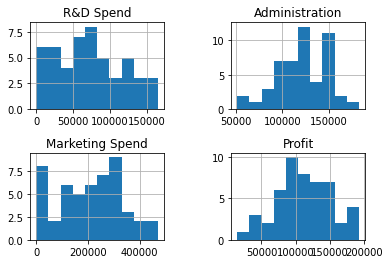

In [ ]:
newinformation = information[["R&D Spend", "Administration",
                              "Marketing Spend", "State", "Profit"]]
print(newinformation.head())
newinformation.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


# Show Scatter of the data

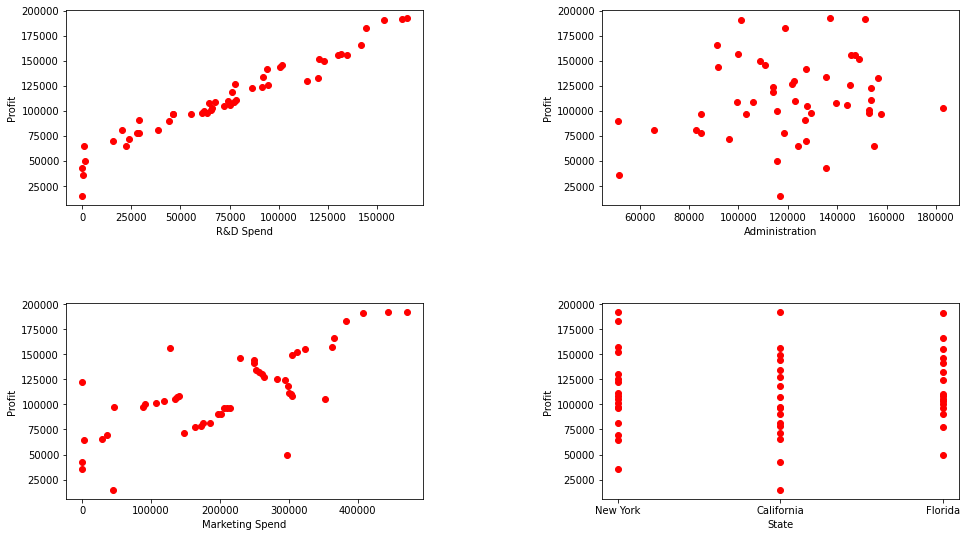

In [ ]:
plt.subplot(2,2,1)
plt.scatter(newinformation["R&D Spend"],
            newinformation["Profit"], color="red")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")

plt.subplot(2,2,2)
plt.scatter(newinformation["Administration"],
            newinformation["Profit"], color="red")
plt.xlabel("Administration")
plt.ylabel("Profit")

plt.subplot(2,2,3)
plt.scatter(newinformation["Marketing Spend"],
            newinformation["Profit"], color="red")
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")

plt.subplot(2,2,4)
plt.scatter(newinformation["State"],
            newinformation["Profit"], color="red")
plt.xlabel("State")
plt.ylabel("Profit")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


# Correlation of data

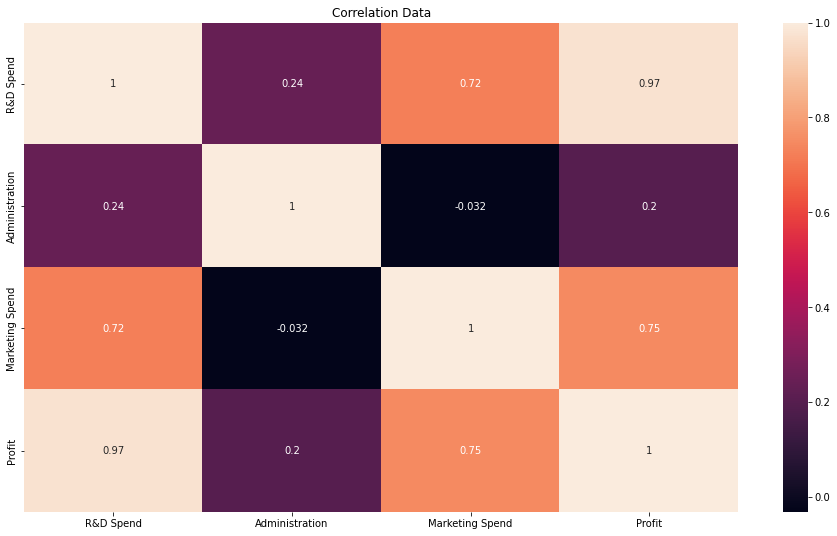

In [ ]:
sb.heatmap(information.corr(), annot=True)
plt.title("Correlation Data")
plt.show()

### Karena Data Administration memiliki korelasi data yang kecil maka dia akan drop, dan karena korelasi yang sangat kuat dengan R&D Spend

In [ ]:
information = information.drop('Administration', axis=1)
information = information.drop('Marketing Spend', axis=1)
information.head(10)

,R&D Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94
5,131876.90,New York,156991.12
6,134615.46,California,156122.51
7,130298.13,Florida,155752.60
8,120542.52,New York,152211.77
9,123334.88,California,149759.96


# melakukan pengklasifikasian State Secara manual

In [ ]:
Uniquespecies = information["State"].unique()
i = 0
loop = 0
NewYorklist = [0] * len(information["State"])
Californialist = [0] * len(information["State"])
Floridalist = [0] * len(information["State"])
for data in Uniquespecies:
    loop = 0
    for dataState in information["State"]:
        if dataState == data:
            if data == "California" :
                Californialist[loop] = 1
            elif data == "New York" :
                NewYorklist[loop] = 1
            elif data == "Florida":
                Floridalist[loop] = 1
        loop += 1
    i += 1
information["New York"] = pd.DataFrame(NewYorklist, columns=["New York"])
information["California"] = pd.DataFrame(Californialist, columns=["California"])
information["Florida"] = pd.DataFrame(Floridalist, columns=["Florida"])
information


,R&D Spend,State,Profit,New York,California,Florida
0,165349.20,New York,192261.83,1,0,0
1,162597.70,California,191792.06,0,1,0
2,153441.51,Florida,191050.39,0,0,1
3,144372.41,New York,182901.99,1,0,0
4,142107.34,Florida,166187.94,0,0,1
5,131876.90,New York,156991.12,1,0,0
6,134615.46,California,156122.51,0,1,0
7,130298.13,Florida,155752.60,0,0,1
8,120542.52,New York,152211.77,1,0,0
9,123334.88,California,149759.96,0,1,0


# Cleaning Data

### Membuang State karena state sudah digantikan oleh masing masing daerah

In [ ]:
NewInformation = information.drop('State', axis=1)
# Karena California memiliki 2 data dengan nilai R&D Spend 0 Maka kita drop agar tidak terdapat noise pada dataset kita
NewInformation = NewInformation.drop('California', axis=1)
NewInformation.head(10)


,R&D Spend,Profit,New York,Florida
0,165349.20,192261.83,1,0
1,162597.70,191792.06,0,0
2,153441.51,191050.39,0,1
3,144372.41,182901.99,1,0
4,142107.34,166187.94,0,1
5,131876.90,156991.12,1,0
6,134615.46,156122.51,0,0
7,130298.13,155752.60,0,1
8,120542.52,152211.77,1,0
9,123334.88,149759.96,0,0


# Split data for X -> features dan y sebagai result

In [ ]:
x = NewInformation[["R&D Spend", "New York", "Florida"]]
y = NewInformation["Profit"]

# Split data menjadi 80% untuk training dan 20% untuk testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size = 0.8, test_size = 0.2)
print(x_train)
print(y_train)

    R&D Spend  New York  Florida
18   91749.16         0        1
24   77044.01         1        0
21   78389.47         1        0
1   162597.70         0        0
15  114523.61         1        0
41   27892.92         0        1
11  100671.96         0        0
10  101913.08         0        1
14  119943.24         0        1
32   63408.86         0        0
35   46014.02         1        0
42   23640.93         0        0
12   93863.75         0        1
22   73994.56         0        1
27   72107.60         1        0
46    1315.46         0        1
49       0.00         0        0
33   55493.95         0        1
36   28663.76         0        1
20   76253.86         0        0
0   165349.20         1        0
48     542.05         1        0
25   64664.71         0        0
5   131876.90         1        0
4   142107.34         0        1
26   75328.87         0        1
8   120542.52         1        0
23   67532.53         0        1
17   94657.16         1        0
3   144372

# Standarisasi Data Training

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTransformed = sc.fit_transform(x)

# Informasi data baik learning rate dan iteration

In [ ]:
LearningRate = 0.001
Iteration = 5000


# Split the data to a Train Set and Test Set using train_test_split

fungsi dari predict data untuk melihat hasil prediksi data

In [ ]:
def PredictData(m, b, Data):
    return np.dot(Data, m) + b


fungsi untuk melakukan perhitungan MSE

In [ ]:
def MSEcalculation(Y, predicteddata):
    value = 0
    for i in range(information.shape[0]):
        value += (Y[i]-predicteddata[i])**2
    return (value/information.shape[0])

Print hasil iteration

In [ ]:
def PrintIteration(lossData):
    plt.plot(np.arange(1, Iteration), lossData[1:])
    plt.xlabel("Iteration")
    plt.ylabel("MSE")


Fungsi utama dari gradient descent

In [ ]:
import numpy as np
def gradientDescent(X, Y):
    b = 0 
    m = np.zeros(X.shape[1])
    lossData = []
    count = X.shape[0]
    for _ in range(Iteration) :
        PredictionData = PredictData(m, b, X)
        Newbias = (2 * np.sum(PredictionData - y)) / count
        Newm = (2 * np.dot(X.T, (PredictionData - y))) / count
        PredictionMSE = MSEcalculation(y, PredictionData)
        lossData.append(PredictionMSE)
        m -= LearningRate * Newm
        b -= LearningRate * Newbias
    PrintIteration(lossData)
    

    return m, b


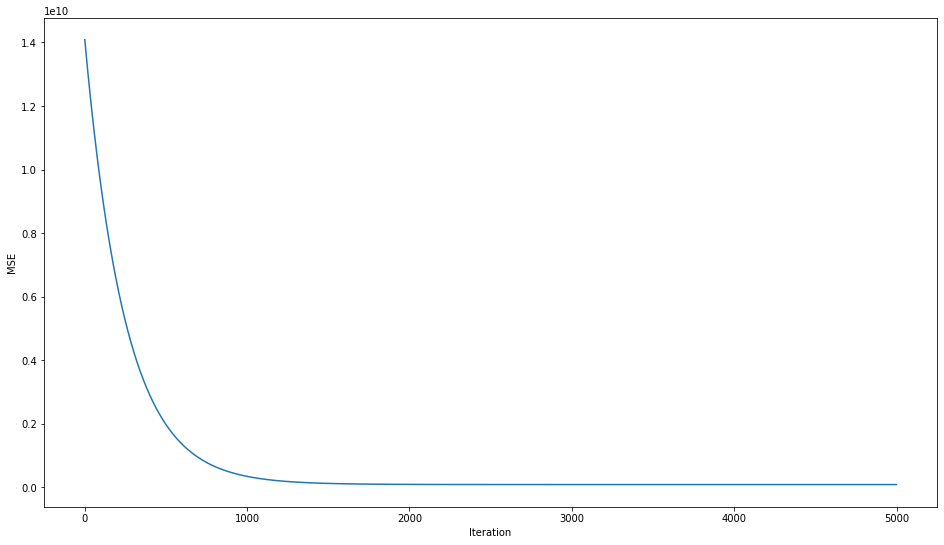

In [ ]:
m, b = gradientDescent(XTransformed, y)


In [ ]:
print('Weight : ', m)

Weight :  [38749.92238704    42.24398052   581.53084606]


In [ ]:
print('Bias : ', b)

Bias :  112007.6045015152


Predict data using m and new b

In [ ]:
PredictTesting = pd.DataFrame(PredictData(m, b, sc.transform(x)))
PredictTesting.head()


,0
0,189803.32
1,187367.79
2,180806.46
3,171915.28
4,171141.20


Display the Result

In [ ]:
Result = pd.DataFrame(y, columns=["Profit"])
Result["Predict"] = PredictTesting
Result.head()


,Profit,Predict
0,192261.83,189803.32
1,191792.06,187367.79
2,191050.39,180806.46
3,182901.99,171915.28
4,166187.94,171141.20


MSE Counting

In [ ]:
print(f'{MSEcalculation(Result["Profit"], Result["Predict"])/Result.shape[1]: f}')


 42416708.188226


Display Using Scatter

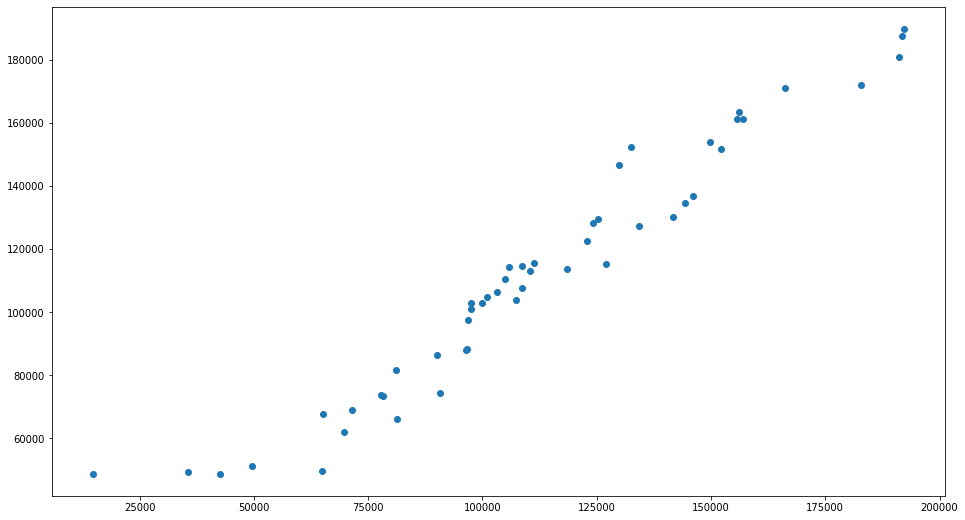

In [ ]:
plt.scatter(Result['Profit'], Result['Predict'])


In [ ]:
print("R2 : ", r2_score(Result['Profit'], Result['Predict']))

R2 :  0.9467159049875069
